In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
numemp = pd.read_excel("/content/drive/MyDrive/공모전 모음/구직하러왔규영/통계검색자료(2021년3분기).xls")
numemp

,기관명,기관유형,항목,2016,2017,2018,2019,2020,2021,단위,부설기관여부
0,(사)남북교류협력지원협회,기타공공기관,임직원수 > 정규직 > 일반정규직 > 현원 > 계,30.00,26.50,28.75,28.50,30.50,29.0,명,N
1,(사)남북교류협력지원협회,기타공공기관,임직원수 > 비정규직 > 기간제 > 계,0.00,3.00,1.00,2.00,1.00,3.0,명,N
2,(재)APEC기후센터,기타공공기관,임직원수 > 정규직 > 일반정규직 > 현원 > 계,72.50,75.00,71.00,62.00,55.75,55.0,명,N
3,(재)APEC기후센터,기타공공기관,임직원수 > 비정규직 > 기간제 > 계,4.00,3.00,4.00,1.00,1.00,3.0,명,N
4,(재)국제원산지정보원,기타공공기관,임직원수 > 정규직 > 일반정규직 > 현원 > 계,37.00,48.00,42.00,45.00,42.00,40.0,명,N
...,...,...,...,...,...,...,...,...,...,...,...
733,해양수산과학기술진흥원,준정부기관(위탁집행형),임직원수 > 비정규직 > 기간제 > 계,2.00,4.00,6.00,2.50,6.50,9.0,명,N
734,해양환경공단,공기업(준시장형),임직원수 > 정규직 > 일반정규직 > 현원 > 계,549.75,591.25,617.00,627.38,614.75,633.0,명,N
735,해양환경공단,공기업(준시장형),임직원수 > 비정규직 > 기간제 > 계,23.00,18.00,5.85,4.00,17.00,17.0,명,N
736,환경보전협회,기타공공기관,임직원수 > 정규직 > 일반정규직 > 현원 > 계,99.00,113.00,122.00,157.00,193.00,199.0,명,N


## 정규직 vs 비정규직 임직원수 비교

In [ ]:
per=numemp.groupby(numemp["항목"]).get_group("임직원수 > 정규직 > 일반정규직 > 현원 > 계")

In [ ]:
contract = numemp.groupby(numemp["항목"]).get_group("임직원수 > 비정규직 > 기간제 > 계")

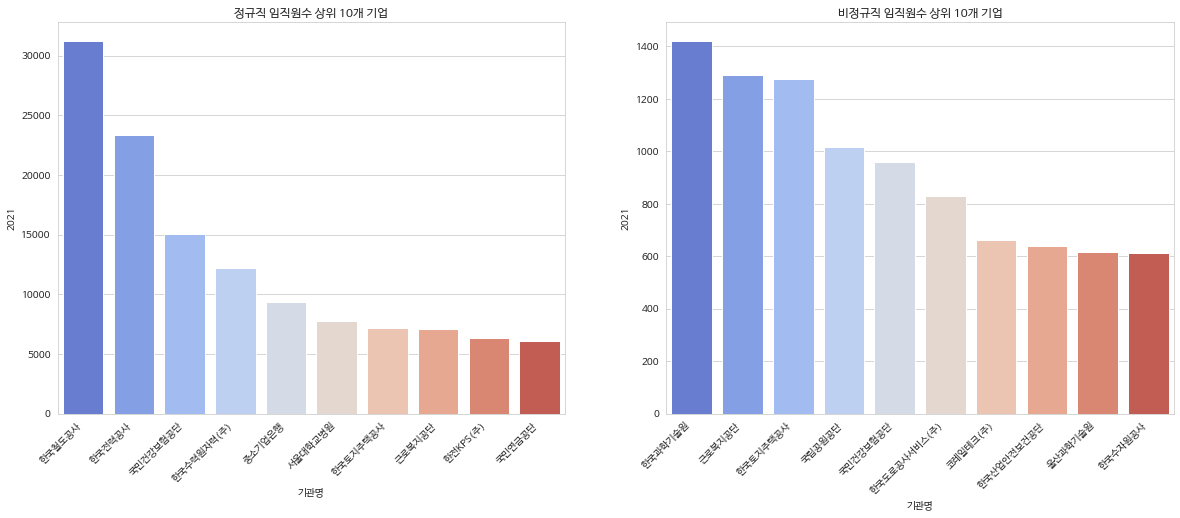

In [ ]:
# 상위 10개

fig = plt.figure(figsize=(20,8))
plt.rc('font', family='NanumBarunGothic') 

#sns.set_style('whitegrid')

area1=fig.add_subplot(1,2,1)
area1.set_title('정규직 임직원수 상위 10개 기업')

area2=fig.add_subplot(1,2,2)
area2.set_title('비정규직 임직원수 상위 10개 기업')
fig.autofmt_xdate(rotation=45)
# 정규직 임직원수 상위 10개 기업
per_sort= per.sort_values(2021, ascending=False).head(10)

sns.barplot(
    data= per_sort,
    x= per_sort["기관명"],
    y= per_sort[2021],
    palette="coolwarm",
    ax=area1
)

# 비정규직 임직원수 상위 10개 기업
contract_sort= contract.sort_values(2021, ascending=False).head(10)

sns.barplot(
    data= contract_sort,
    x= contract_sort["기관명"],
    y= contract_sort[2021],
    palette="coolwarm",
    ax=area2
)
plt.show()


정규직 임직원수가 가장 많은 기업은 한국 철도 공사였으나 비정규직 임직원수가 가장 많은 기업은 한국 과학 기술원이었다.  
한국 과학 기술원의 경우 연구원이 계약직으로 계약되는 경우가 많은 것은 아닐까라고 예상하였다.  
국민 건강 보험 공단과 근로복지 공단의 경우 정규직 임직원수도 많으나 비정규직 임직원 수 또한 많다. 

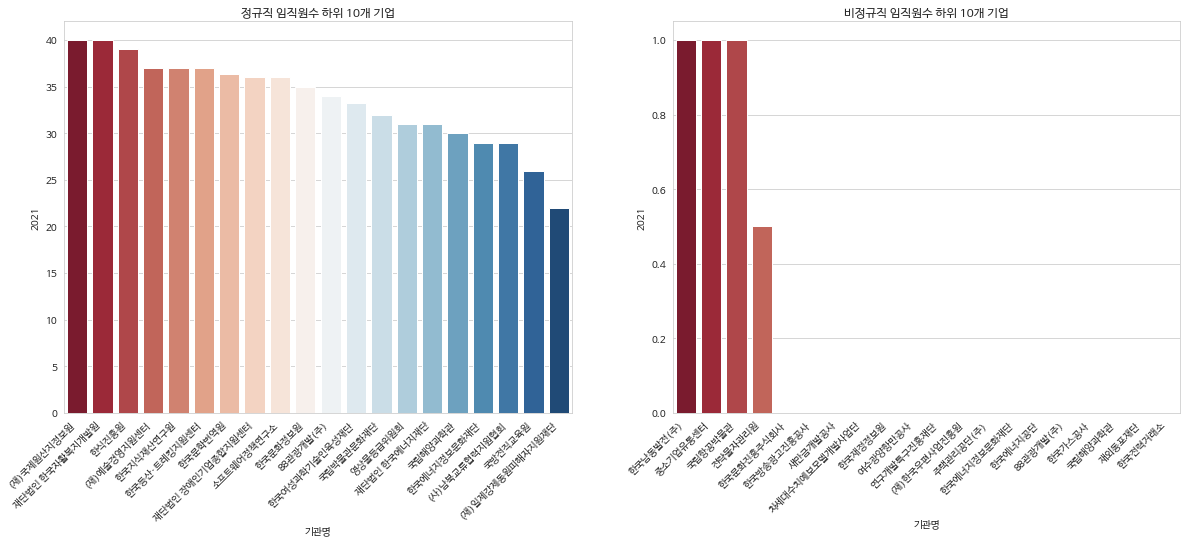

In [ ]:
# 하위 10개

fig = plt.figure(figsize=(20,8))
plt.rc('font', family='NanumBarunGothic') 

area1=fig.add_subplot(1,2,1)
area1.set_title('정규직 임직원수 하위 10개 기업')

area2=fig.add_subplot(1,2,2)
area2.set_title('비정규직 임직원수 하위 10개 기업')
fig.autofmt_xdate(rotation=45)
# 정규직 임직원수 하위 10개 기업
per_sort_tail= per.sort_values(2021, ascending=False).tail(20)

sns.barplot(
    data= per_sort_tail,
    x= per_sort_tail["기관명"],
    y= per_sort_tail[2021],
    palette="RdBu",
    ax=area1
)

# 비정규직 임직원수 하위 10개 기업
contract_sort_tail= contract.sort_values(2021, ascending=False).tail(20)

sns.barplot(
    data= contract_sort_tail,
    x= contract_sort_tail["기관명"],
    y= contract_sort_tail[2021],
    palette="RdBu",
    ax=area2
)
plt.show()


88관광개발(주), 국립해양과학관, 한국에너지정보문화재단는 정규직 임직원수 상위 10위 안에 들면서 동시에 비정규직 임직원수가 0명인 기업들로 상당한 안정성을 가지고 있을 것으로 평가된다.  
그와 반대로 한국등산 트레킹지원센터는 비정규직 임직원수 상위 10위 안에 들면서 정규직 임직원수 하위 20위 안에 들어 비정규직이 많은 기업으로 안정성을 보장할 수 없을 것으로 예상된다. 

한국등산·트레킹지원센터	

## 02. 코로나 전후 정규직, 비정규직 임직원수 차이

In [ ]:
# 코로나 이전인 2019년도와 코로나 이후인 2021년 임직원수의 차이 
per=numemp.groupby(numemp["항목"]).get_group("임직원수 > 정규직 > 일반정규직 > 현원 > 계")
per= per.assign(covid=lambda x: (x[2021]-x[2019]))

In [ ]:
# 코로나 이전인 2019년도와 코로나 이후인 2021년 임직원수의 차이 
ontract=numemp.groupby(numemp["항목"]).get_group("임직원수 > 비정규직 > 기간제 > 계")
contract= contract.assign(covid=lambda x: (x[2021]-x[2019]))

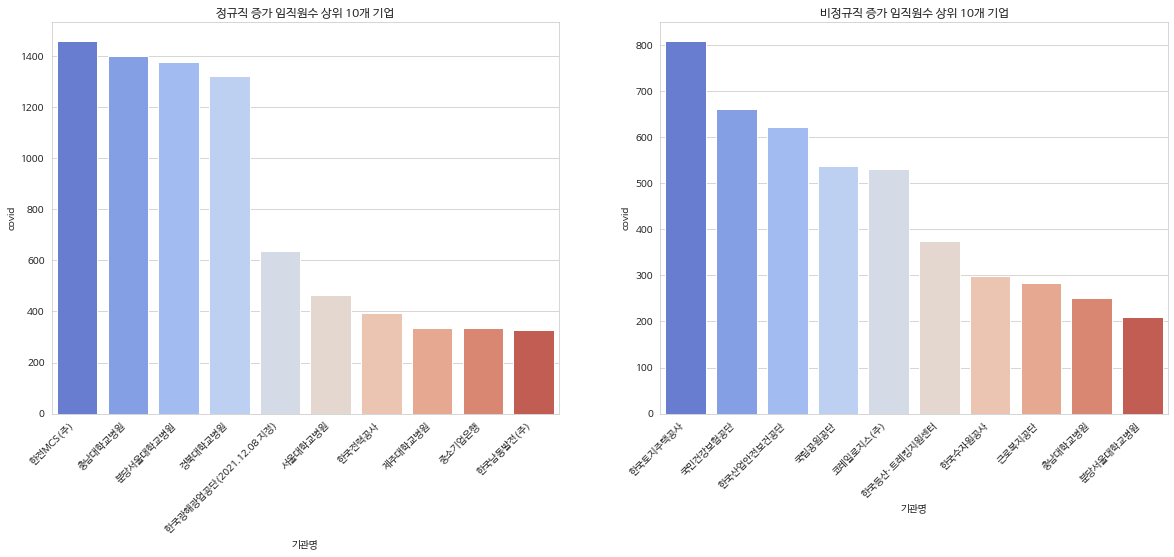

In [ ]:
# 상위 10개

fig = plt.figure(figsize=(20,8))
plt.rc('font', family='NanumBarunGothic') 

#sns.set_style('whitegrid')

area1=fig.add_subplot(1,2,1)
area1.set_title('정규직 증가 임직원수 상위 10개 기업')

area2=fig.add_subplot(1,2,2)
area2.set_title('비정규직 증가 임직원수 상위 10개 기업')
fig.autofmt_xdate(rotation=45)

# 정규직 임직원수 증가 상위 10개 기업
per_sort= per.sort_values('covid', ascending=False).head(10)

sns.barplot(
    data= per_sort,
    x= per_sort["기관명"],
    y= per_sort["covid"],
    palette="coolwarm",
    ax=area1
)

# 비정규직 임직원수 증가 상위 10개 기업
contract_sort= contract.sort_values('covid', ascending=False).head(10)

sns.barplot(
    data= contract_sort,
    x= contract_sort["기관명"],
    y= contract_sort["covid"],
    palette="coolwarm",
    ax=area2
)
plt.show()


코로나 이전에 비해 코로나 이후 정규직 임직원수가 가장 많이 증가한 곳은 한전 MCS 기업이며 충남대학병원, 분당서울대병원, 경북대병원, 서룽대병원, 제주대병원과 같이 대학병원의 정규직이 많이 증가함을 알 수 있다.  
비정규직 임직원수의 경우 한국 토지 주택 공사 임직원수가 가장 많이 증가하였으며 충남대학병원, 분당서울대병원의 경우 비정규직 임직원 또한 많이 증가하였다.  
이를 통해 코로나 19의 영향으로 급히 비정규직 의료인을 많이 채용한 것은 아닐까라고 예상하였다. 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


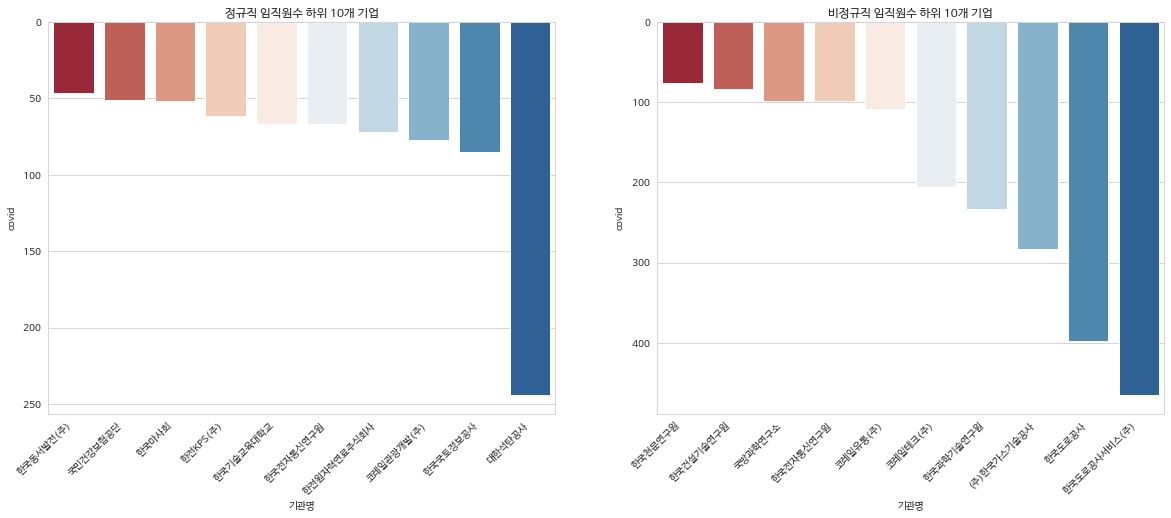

In [ ]:
# 하위 10개

fig = plt.figure(figsize=(20,8))
plt.rc('font', family='NanumBarunGothic') 

area1=fig.add_subplot(1,2,1)
area1.set_title('정규직 임직원수 하위 10개 기업')

area2=fig.add_subplot(1,2,2)
area2.set_title('비정규직 임직원수 하위 10개 기업')
fig.autofmt_xdate(rotation=45)

# 정규직 임직원수 하위 10개 기업
per_sort_tail= per.sort_values('covid', ascending=False).tail(10)

sns.barplot(
    data= per_sort_tail,
    x= per_sort_tail["기관명"],
    y= per_sort_tail['covid'],
    palette="RdBu",
    ax=area1
)

# 비정규직 임직원수 하위 10개 기업
contract_sort_tail= contract.sort_values('covid', ascending=False).tail(10)

sns.barplot(
    data= contract_sort_tail,
    x= contract_sort_tail["기관명"],
    y= contract_sort_tail["covid"],
    palette="RdBu",
    ax=area2
)
plt.show()


코레일, 한국도로공사와 같이 관광과 관련된 기업에서 코로나 이전(2019년)에 비해 코로나 이후(2021년) 임직원수가 적음을 보이고 있다.  
이를 코로나로 인해 관광업이 활성화 되지 못했기 때문이 아닐까라고 예측해 보았다. 

비정규직 증가 상위 10위, 정규직 해고 상위 10위 : 국민건강보험공단  
즉, 국민건강보험공단은 정규직보다는 비정규직을 많이 뽑게 되었음을 알 수 있다. 

코레일유통, 코레일테크, 한국도로공사, 한국도로공사서비스